In [1]:
import os, sys
import glob
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import cv2
from skimage.transform import rotate

In [2]:
pdf = os.path.join(os.getcwd(), 'pdf')
CELLPHONE_IMG_PATH = os.path.join(pdf, 'minidataset_cell')
DB_PATH            = os.path.join(pdf, 'mini_dataset_png')

In [3]:
sift = cv2.xfeatures2d.SIFT_create()

In [4]:
png_paths = glob.glob(os.path.join(DB_PATH, '*.png'))

In [5]:
db = {}

In [6]:
for i in range(len(png_paths)):
    img = cv2.imread(png_paths[i], 0)
    kp, des = sift.detectAndCompute(img, None)
    db[png_paths[i]] = (kp, des)
    print("Finish computing SIFT descriptor {:}/{:}".format(i+1, len(png_paths)))

Finish computing SIFT descriptor 1/210
Finish computing SIFT descriptor 2/210
Finish computing SIFT descriptor 3/210
Finish computing SIFT descriptor 4/210
Finish computing SIFT descriptor 5/210
Finish computing SIFT descriptor 6/210
Finish computing SIFT descriptor 7/210
Finish computing SIFT descriptor 8/210
Finish computing SIFT descriptor 9/210
Finish computing SIFT descriptor 10/210
Finish computing SIFT descriptor 11/210
Finish computing SIFT descriptor 12/210
Finish computing SIFT descriptor 13/210
Finish computing SIFT descriptor 14/210
Finish computing SIFT descriptor 15/210
Finish computing SIFT descriptor 16/210
Finish computing SIFT descriptor 17/210
Finish computing SIFT descriptor 18/210
Finish computing SIFT descriptor 19/210
Finish computing SIFT descriptor 20/210
Finish computing SIFT descriptor 21/210
Finish computing SIFT descriptor 22/210
Finish computing SIFT descriptor 23/210
Finish computing SIFT descriptor 24/210
Finish computing SIFT descriptor 25/210
Finish co

Finish computing SIFT descriptor 204/210
Finish computing SIFT descriptor 205/210
Finish computing SIFT descriptor 206/210
Finish computing SIFT descriptor 207/210
Finish computing SIFT descriptor 208/210
Finish computing SIFT descriptor 209/210
Finish computing SIFT descriptor 210/210


In [7]:
query_path = os.path.join(CELLPHONE_IMG_PATH, 'IMG_9133.jpg')

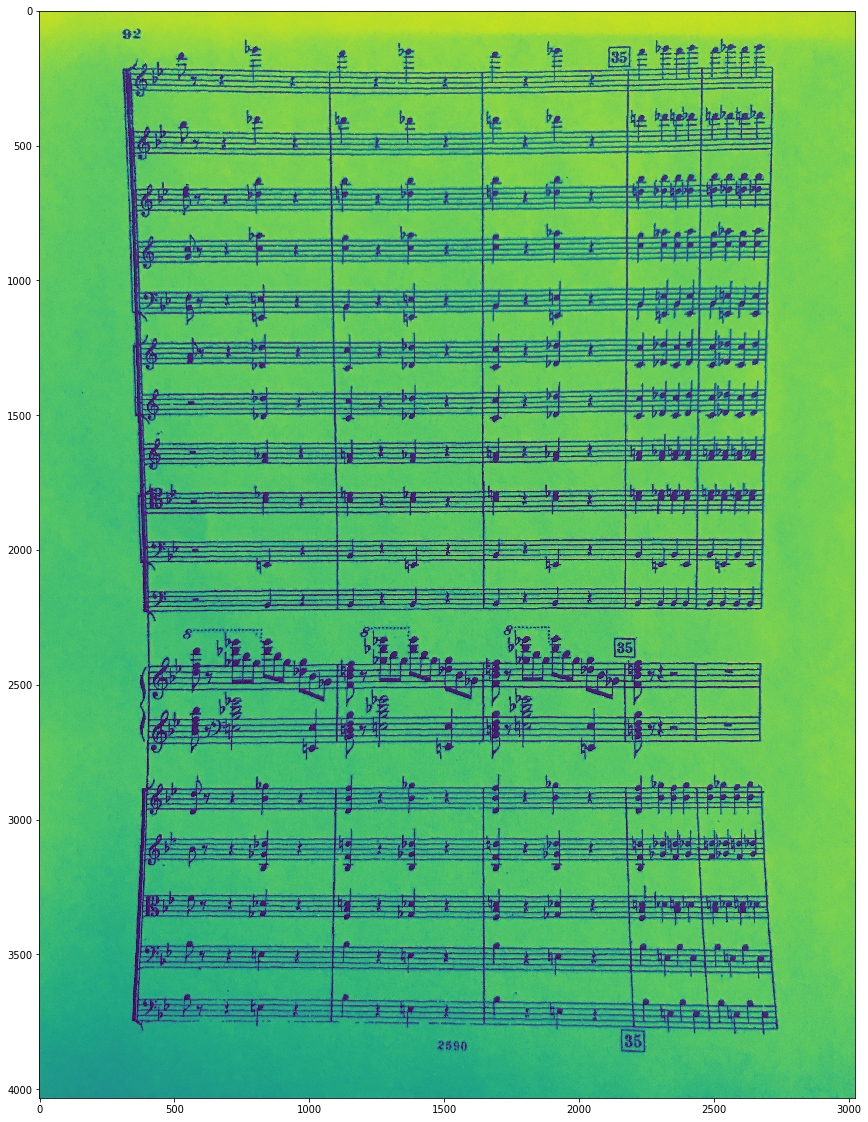

In [8]:
img = cv2.imread(query_path, 0)
plt.figure(figsize=(20,20))
plt.imshow(img)

In [9]:
kp_query, des_query = sift.detectAndCompute(img, None)

In [10]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [11]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [12]:
scoreList = []

In [13]:
for idx in range(len(png_paths)):
    ref_path = png_paths[idx]
    matches = flann.knnMatch(db[ref_path][1], des_query, k=2)
    
    totalDistance = 0
    counterGood = 0
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            counterGood += 1
            totalDistance += m.distance
            
    scoreList.append({
        'path': ref_path,
        'distance': totalDistance,
        'n_pairs': counterGood,
    })
    print("Finish searching {:}/{:} distance = {:} (# good pairs = {:})".format(idx+1, 
                                                                                len(png_paths), 
                                                                                totalDistance,
                                                                                counterGood))

Finish searching 1/210 distance = 37668.7864037 (# good pairs = 262)
Finish searching 2/210 distance = 3384.5091629 (# good pairs = 19)
Finish searching 3/210 distance = 2382.87793732 (# good pairs = 13)
Finish searching 4/210 distance = 2784.39822388 (# good pairs = 15)
Finish searching 5/210 distance = 6260.15851593 (# good pairs = 40)
Finish searching 6/210 distance = 408.406921387 (# good pairs = 2)
Finish searching 7/210 distance = 1247.20544434 (# good pairs = 6)
Finish searching 8/210 distance = 4404.77403259 (# good pairs = 25)
Finish searching 9/210 distance = 1791.43367004 (# good pairs = 9)
Finish searching 10/210 distance = 1407.77586365 (# good pairs = 7)
Finish searching 11/210 distance = 1284.49569702 (# good pairs = 6)
Finish searching 12/210 distance = 2203.20119476 (# good pairs = 16)
Finish searching 13/210 distance = 4964.24326324 (# good pairs = 28)
Finish searching 14/210 distance = 6928.43943024 (# good pairs = 42)
Finish searching 15/210 distance = 23666.2127037

Finish searching 121/210 distance = 2035.50935364 (# good pairs = 13)
Finish searching 122/210 distance = 5794.17454529 (# good pairs = 34)
Finish searching 123/210 distance = 1536.56455994 (# good pairs = 8)
Finish searching 124/210 distance = 3455.96112061 (# good pairs = 18)
Finish searching 125/210 distance = 2970.50965118 (# good pairs = 17)
Finish searching 126/210 distance = 3471.83677673 (# good pairs = 18)
Finish searching 127/210 distance = 4295.80857086 (# good pairs = 24)
Finish searching 128/210 distance = 4838.52810669 (# good pairs = 25)
Finish searching 129/210 distance = 1185.24406433 (# good pairs = 6)
Finish searching 130/210 distance = 3818.09928894 (# good pairs = 21)
Finish searching 131/210 distance = 2369.97797394 (# good pairs = 13)
Finish searching 132/210 distance = 4220.16168213 (# good pairs = 22)
Finish searching 133/210 distance = 430.977104187 (# good pairs = 3)
Finish searching 134/210 distance = 3229.01926422 (# good pairs = 20)
Finish searching 135/21

In [14]:
filteredScore = [score for score in scoreList if score['n_pairs'] > 100]
sortedScore = sorted(filteredScore, key=lambda x: x['distance'])[:10]

[Rank = 1] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/281748_page_5.png has 129 good pairs and distance of 15734.7210846


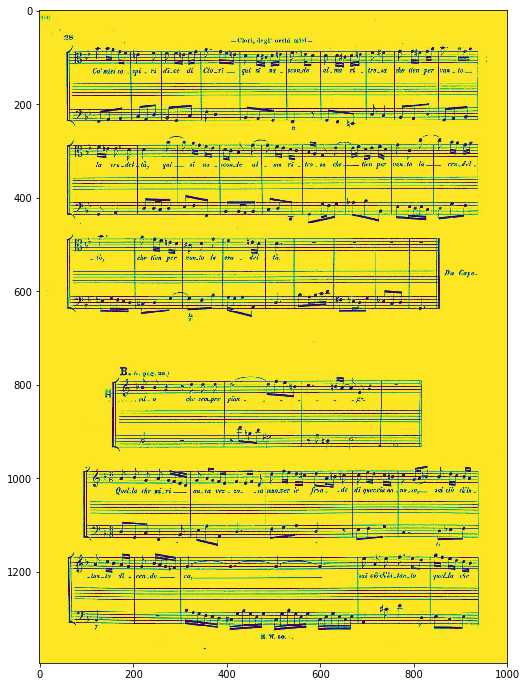

[Rank = 2] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/293281_page_253.png has 153 good pairs and distance of 17960.9133911


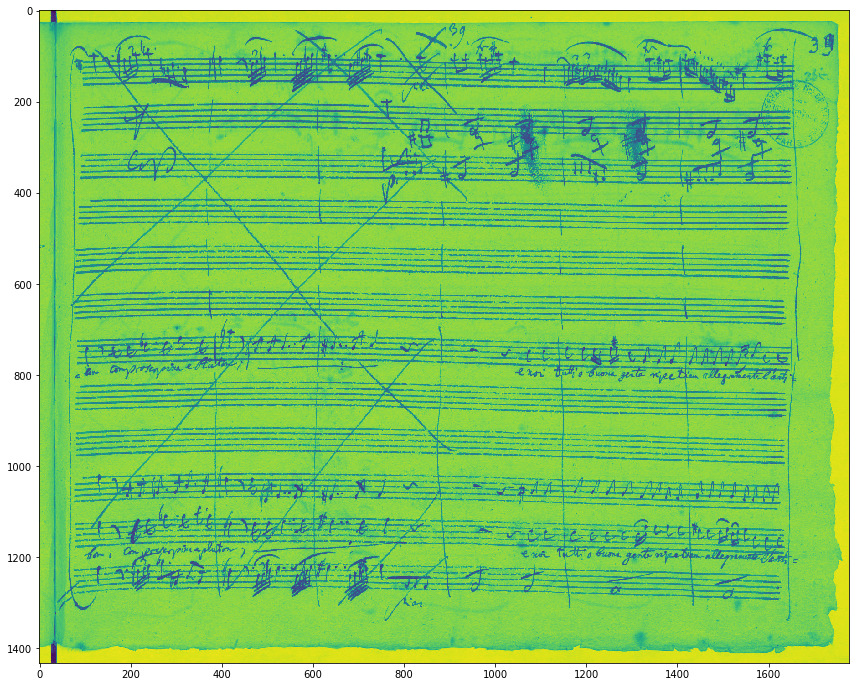

[Rank = 3] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/428455_page_49.png has 115 good pairs and distance of 18046.6399002


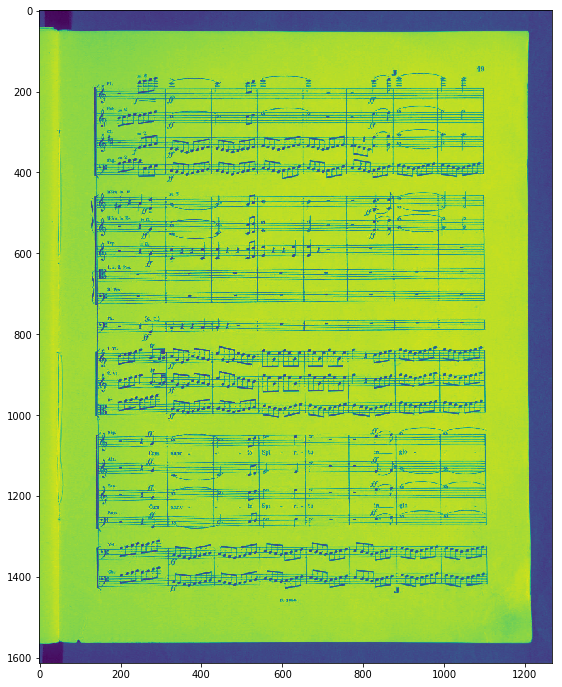

[Rank = 4] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/18971_page_107.png has 144 good pairs and distance of 19829.8297195


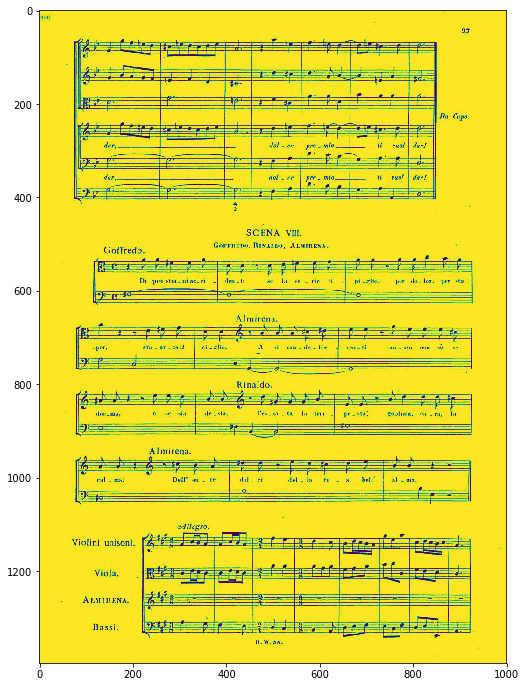

[Rank = 5] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/105117_page_27.png has 150 good pairs and distance of 22373.8193245


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


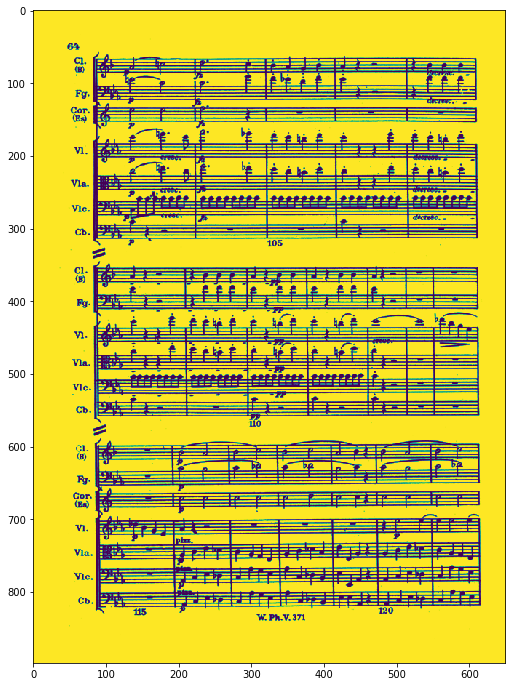

[Rank = 9] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/27475_page_7.png has 230 good pairs and distance of 34802.7134209


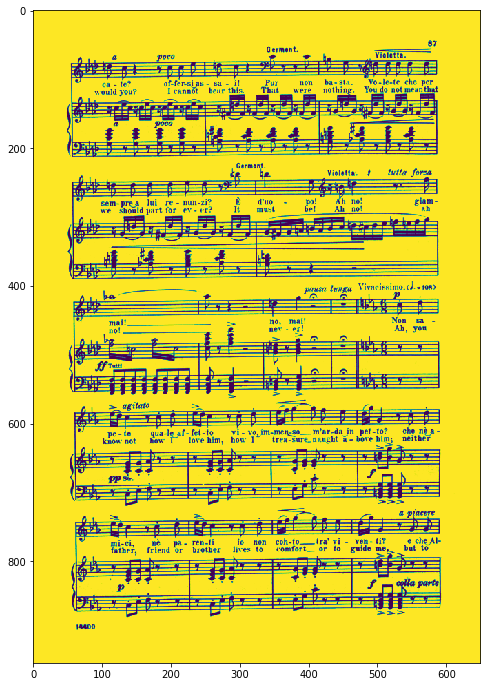

[Rank = 10] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/02267_page_2.png has 237 good pairs and distance of 35239.1766548


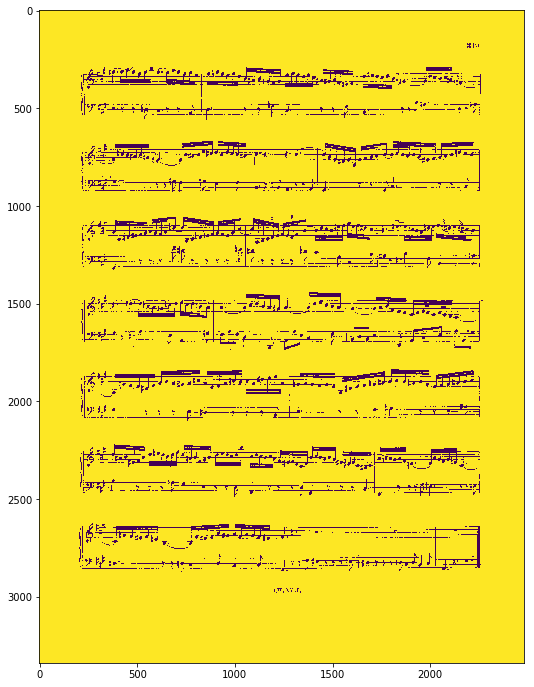

In [16]:
rank = 0
for score in sortedScore:
    rank += 1
    print("[Rank = {:}] {:} has {:} good pairs and distance of {:}".format(rank, score['path'], score['n_pairs'], score['distance']))
    distance = score['distance']
    score = cv2.imread(score['path'], 0)
    plt.figure(figsize=(20,12))
    plt.imshow(score)
    plt.show()

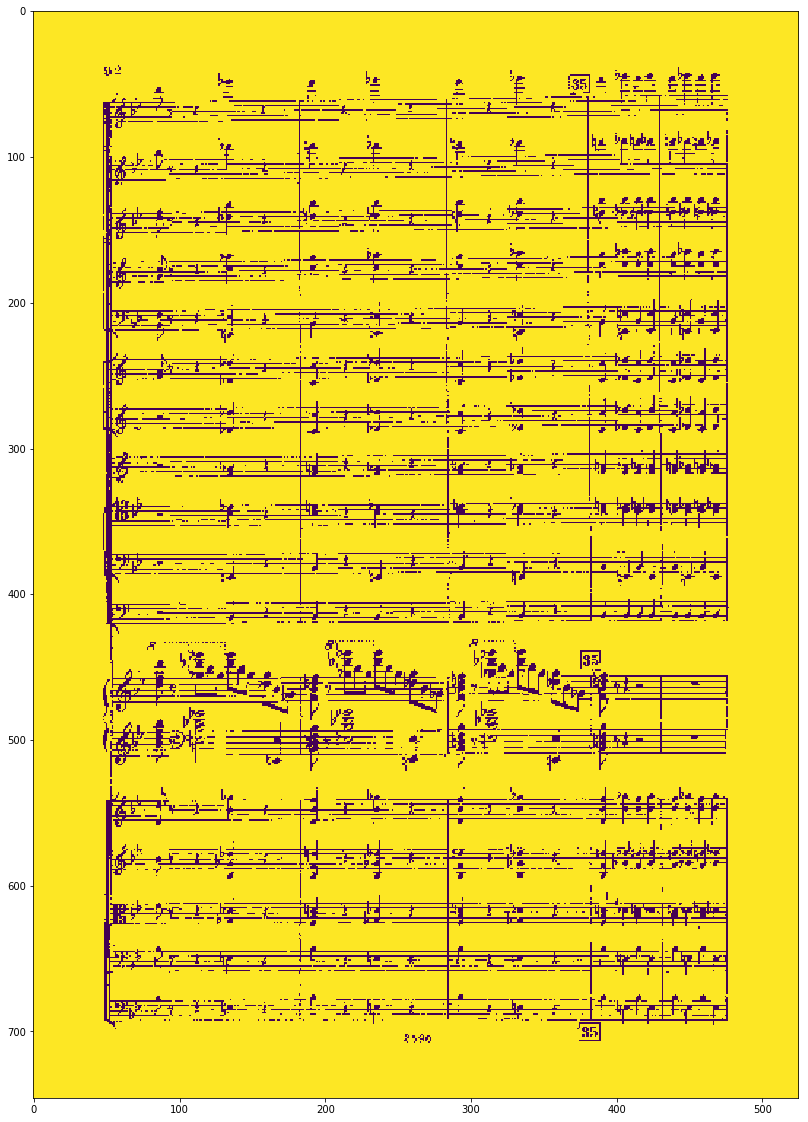

In [18]:
# Visualize the expected musical score
expected_path = os.path.join(DB_PATH, '105370_page_93.png')
expected_img = cv2.imread(expected_path, 0)
plt.figure(figsize=(20,20))
plt.imshow(expected_img)
plt.show()

In [19]:
img_db = cv2.imread(expected_path, 0)
img_query = cv2.imread(query_path, 0)
matches = flann.knnMatch(db[expected_path][1], des_query, k=2)

In [20]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
counterGood = 0
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        counterGood += 1
print("There are {:} good matched pairs".format(counterGood))

There are 158 good matched pairs


In [21]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

In [22]:
img3 = cv2.drawMatchesKnn(img_db,db[expected_path][0],img_query,kp_query,matches,None,**draw_params)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.show()